In [142]:
import numpy as np
import sys
sys.path.append("../..") # Adds higher directory to python modules path.
from data import preprocess

dat = preprocess.preprocess('../../data/raw/CD_PD.mat')

# print(data[0].names)
d = np.dtype(dat[0]).fields
print('features = ', end='')
for attr in d.keys():
    print(attr, end=' ')
print()


features = age date duration ed gender side TMSE t x y p pt diagnosis clock_drawing 


In [143]:
import matplotlib.pyplot as plt

n_person = 137
record = dat[n_person]

p = record['p']
N_p = len(p)
pt = record['pt']
N_pt = len(pt)
N = min(N_p, N_pt)
x = record['x']
y = record['y']
t = record['t']


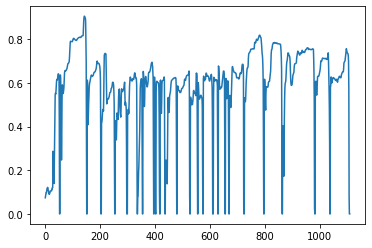

In [144]:
plt.plot(range(N_p), p)

plt.show()

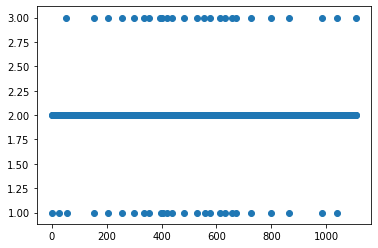

In [145]:
plt.scatter(range(N_pt), pt)

plt.show()

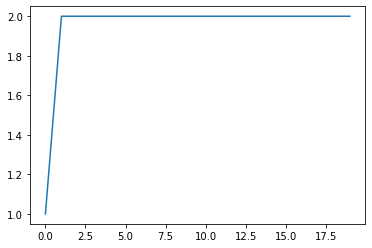

In [146]:
n = 20
plt.plot(range(n), pt[:n])

plt.show()

In [147]:
def get_objects(record):
    p = record['p']
    pt = record['pt']
    x = record['x']
    y = record['y']
    t = record['t']
    N = len(t)

    objects = []
    tmp = []
    for i in range(N):
        tmp.append((p[i], pt[i], x[i], y[i], t[i]))
        if pt[i] == 3:
            tmp = np.array(tmp)
            objects.append(tmp)
            tmp = []
    objects = objects
    return objects
objects = get_objects(record)

number of objects = 25


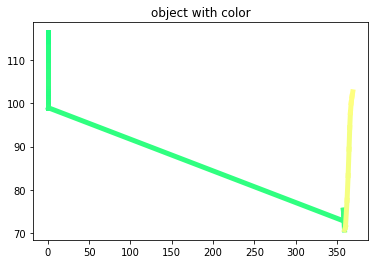

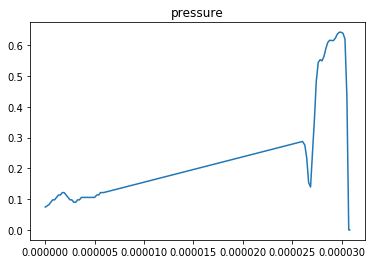

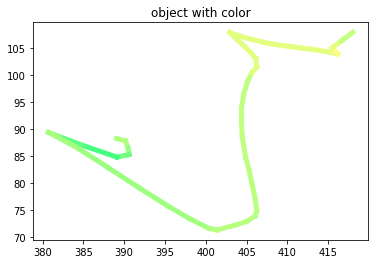

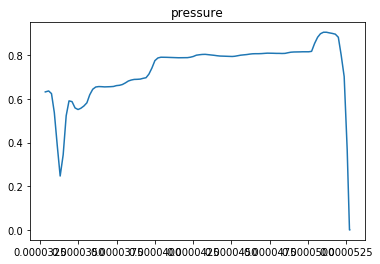

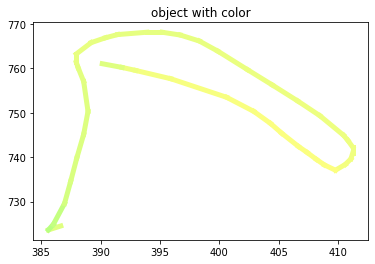

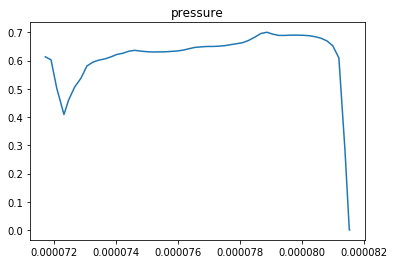

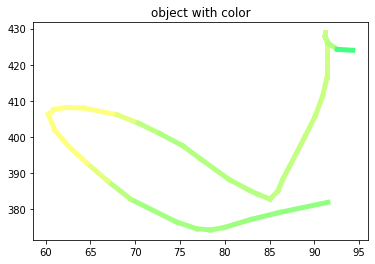

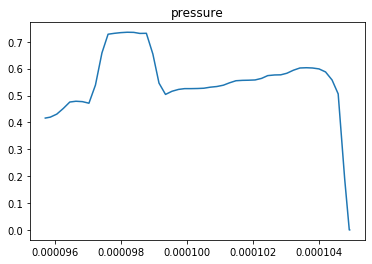

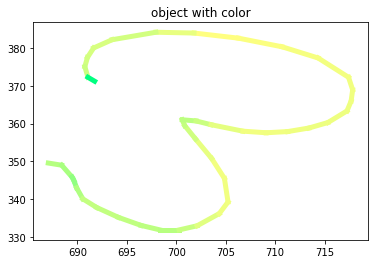

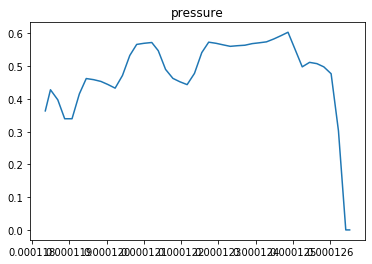

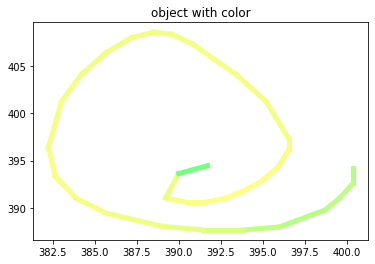

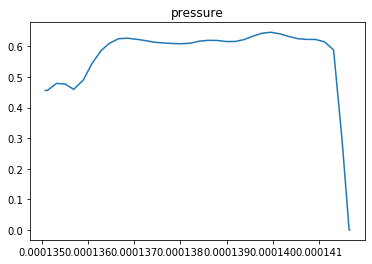

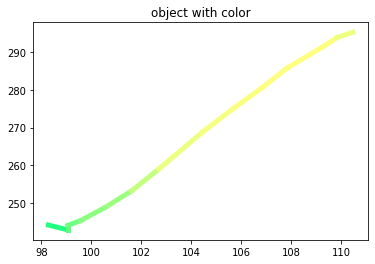

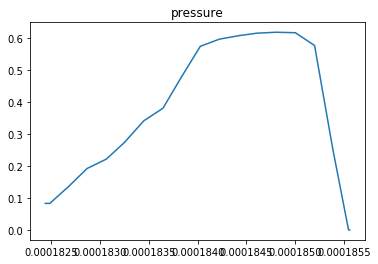

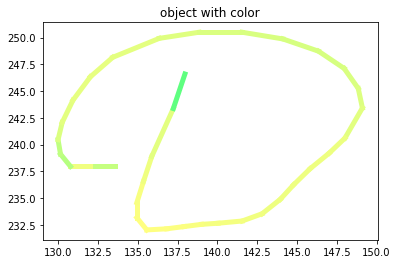

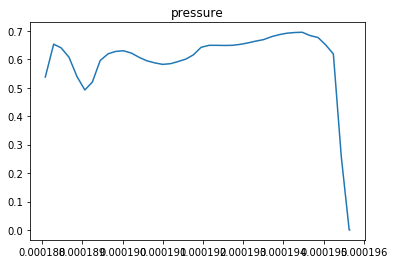

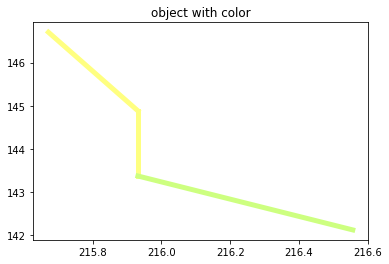

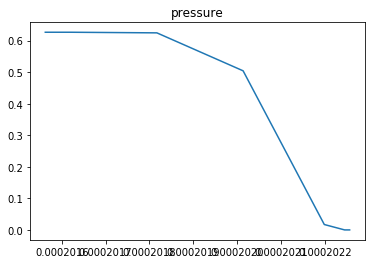

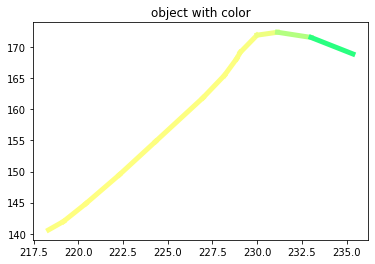

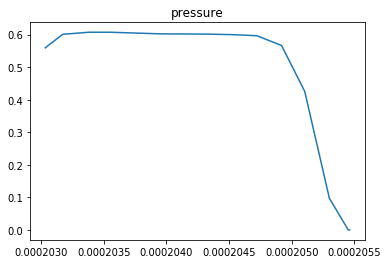

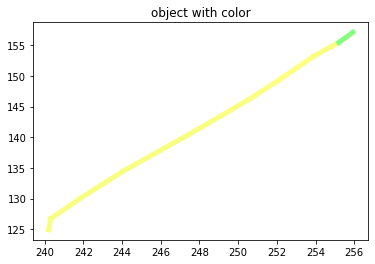

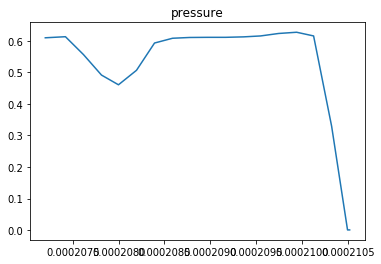

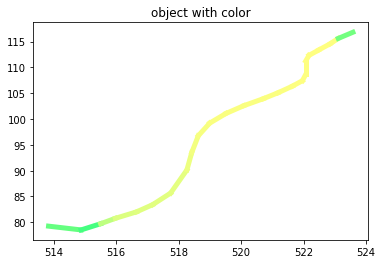

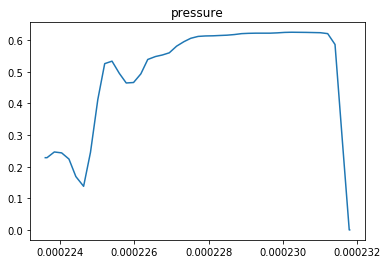

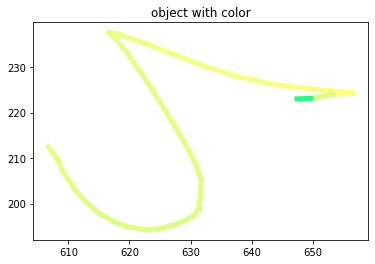

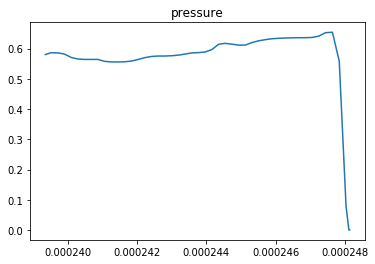

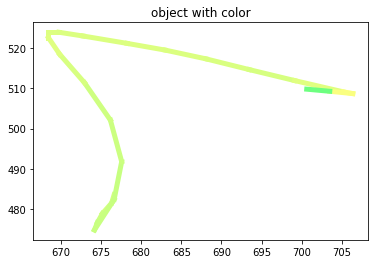

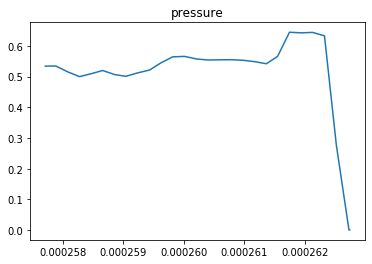

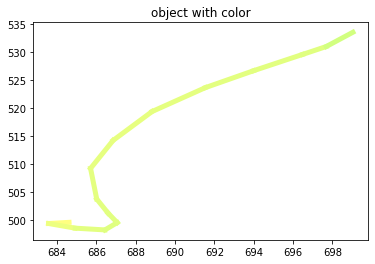

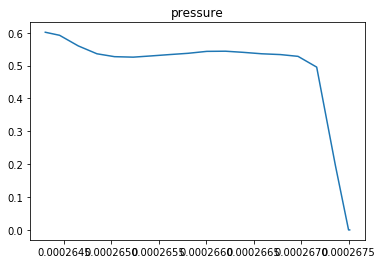

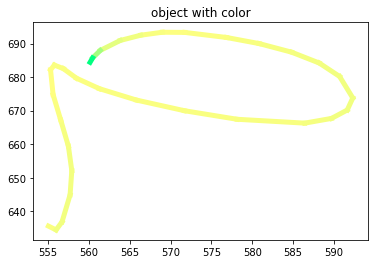

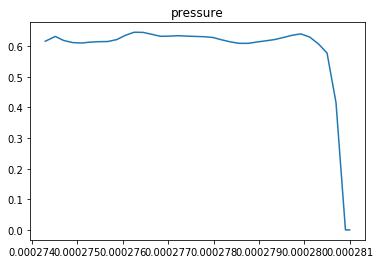

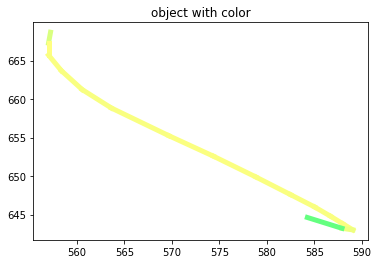

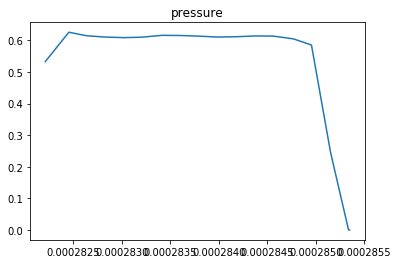

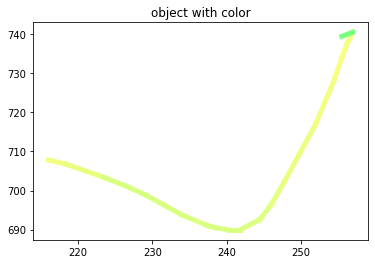

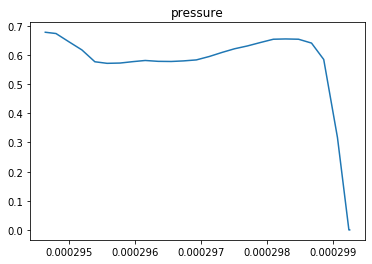

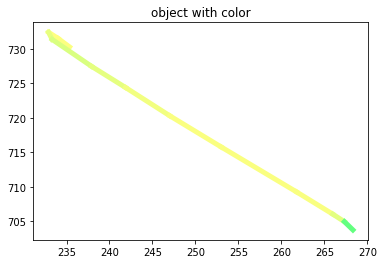

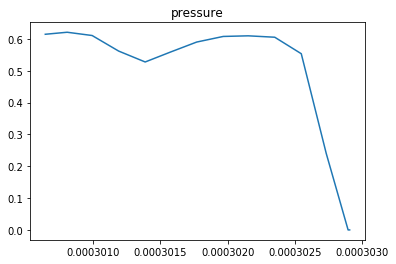

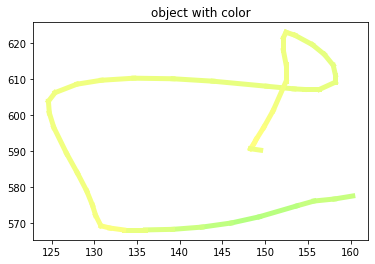

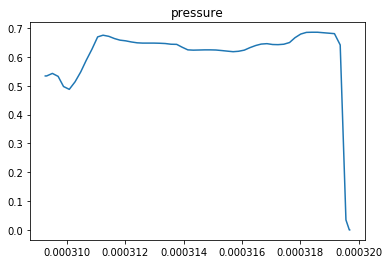

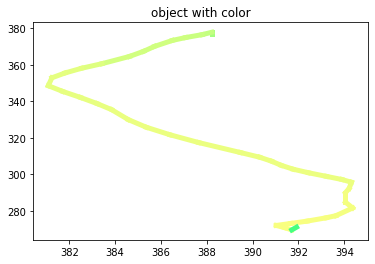

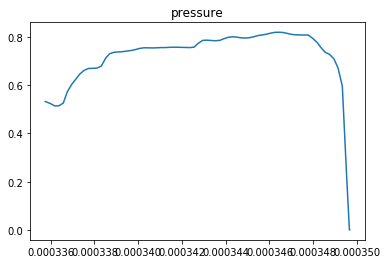

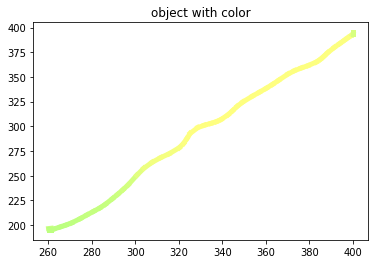

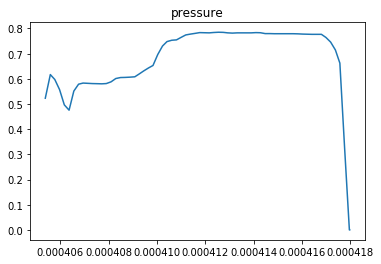

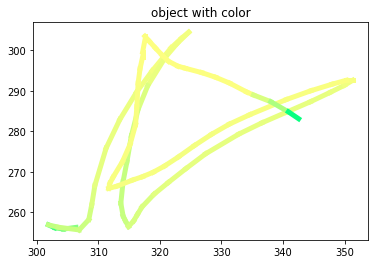

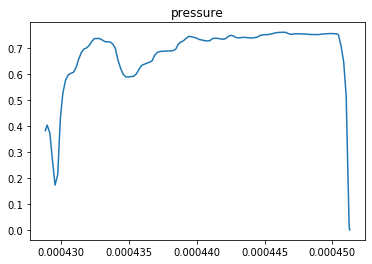

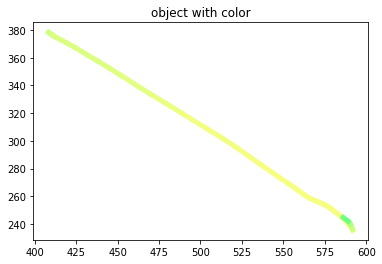

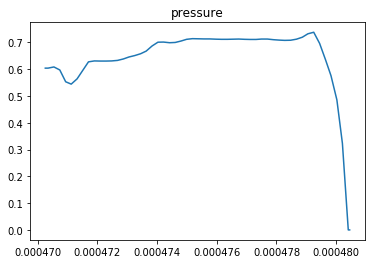

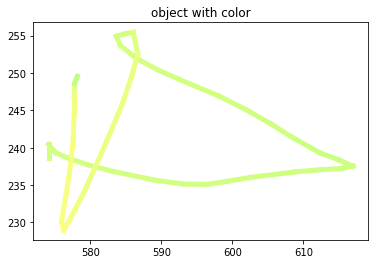

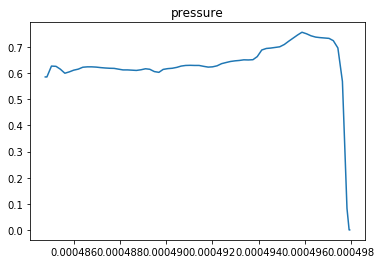

In [148]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

v = cm.get_cmap('viridis', 12)

n_obj = len(objects)
print('number of objects =', n_obj)
for i in range(n_obj):
    obj = objects[i]
    
    p_i = obj[:, 0]
    pt_i = obj[:, 1]
    x_i = obj[:, 2]
    y_i = obj[:, 3]
    t_i = obj[:, 4]
    n = len(t_i)
    
    n_p_i = p_i.shape[0]
    n_pt_i = pt_i.shape[0]
    
#     plt.title('object')
#     plt.plot(x_i, y_i, c='r', alpha=0.3)
#     plt.scatter(x_i, y_i, c=p_i, s=100)
#     plt.show()
    
    plt.title('object with color')
    p_max = max(p_i)
    p_min = min(p_i)
    p_range = p_max - p_min
    for j in range(n - 1):
        p_ij =  (p_i[j] - p_min) / p_range
        p_ij = p_ij
        plt.plot([x_i[j], x_i[j + 1]], 
                 [y_i[j], y_i[j + 1]], 
                 c=[p_ij, 1, 0.5], linewidth=5)
    plt.show()
    
    plt.title('pressure')
    plt.plot(t_i, p_i)
    plt.show()

In [149]:
def get_expected(x, y, func):
    p = 0
    for i in range(len(x) - 1):
        p += (func(y[i + 1]) + func(y[i])) * (x[i + 1] - x[i]) / 2
    p = p / (x[-1] - x[0])
    return p

In [150]:
def get_pressure(obj):
    
    p = obj[:, 0]
    pt = obj[:, 1]
    x = obj[:, 2]
    y = obj[:, 3]
    t = obj[:, 4]
    n = len(t_i)
    
    dt = t[-1] - t[0]
    avg = get_expected(t, p, lambda x: x)
    var = get_expected(t, p, lambda x: x**2) - avg**2
    return avg, dt, var

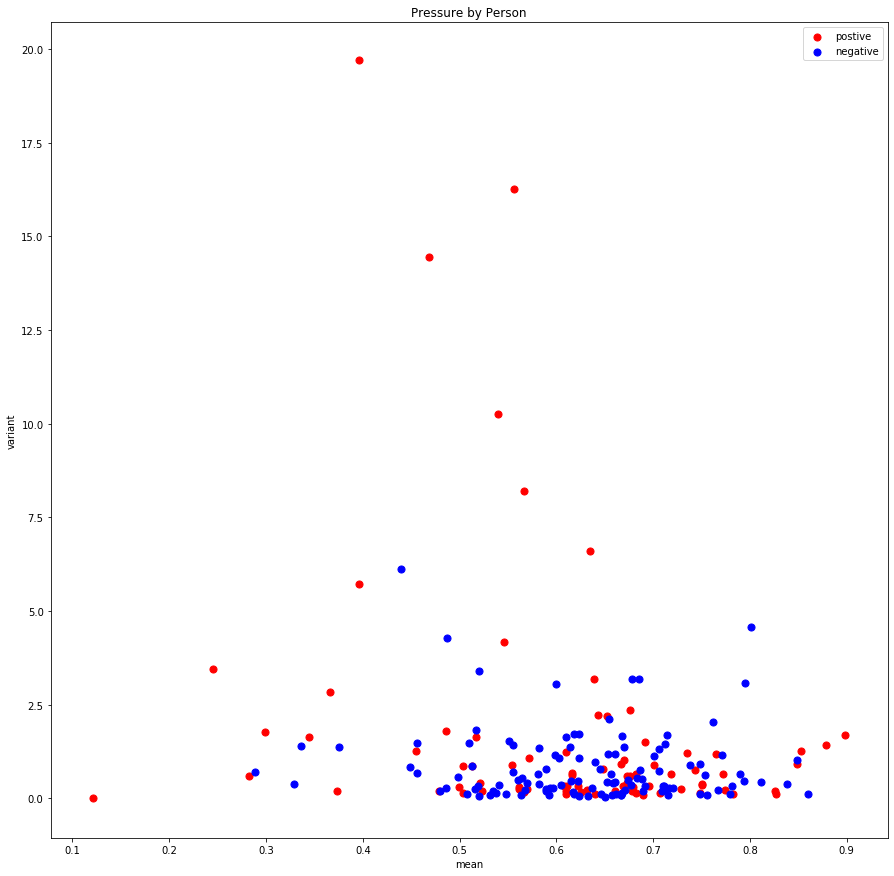

In [151]:
# Pressure by Person

positive_p_mean = []
positive_p_var = []
negative_p_mean = []
negative_p_var = []

for record in dat:
    
    objects = get_objects(record)
    
    mean = 0
    var = 0
    t = 0
    for obj in objects:
        p_mean, dt, p_var = get_pressure(obj)
        mean += p_mean * dt
        var += p_var * dt
        t += dt
    mean /= t
    var /= dt
    
    if record['diagnosis'] == 1:
        positive_p_mean.append(mean)
        positive_p_var.append(var)
    else:
        negative_p_mean.append(mean)
        negative_p_var.append(var)
    
fig, ax = plt.subplots(figsize=(15, 15))
plt.title('Pressure by Person')
plt.xlabel('mean')
plt.ylabel('variant')
s = 50
plt.scatter(positive_p_mean, positive_p_var, c='r', s=s, label='postive')
plt.scatter(negative_p_mean, negative_p_var, c='b', s=s, label='negative')
plt.legend()
plt.show()

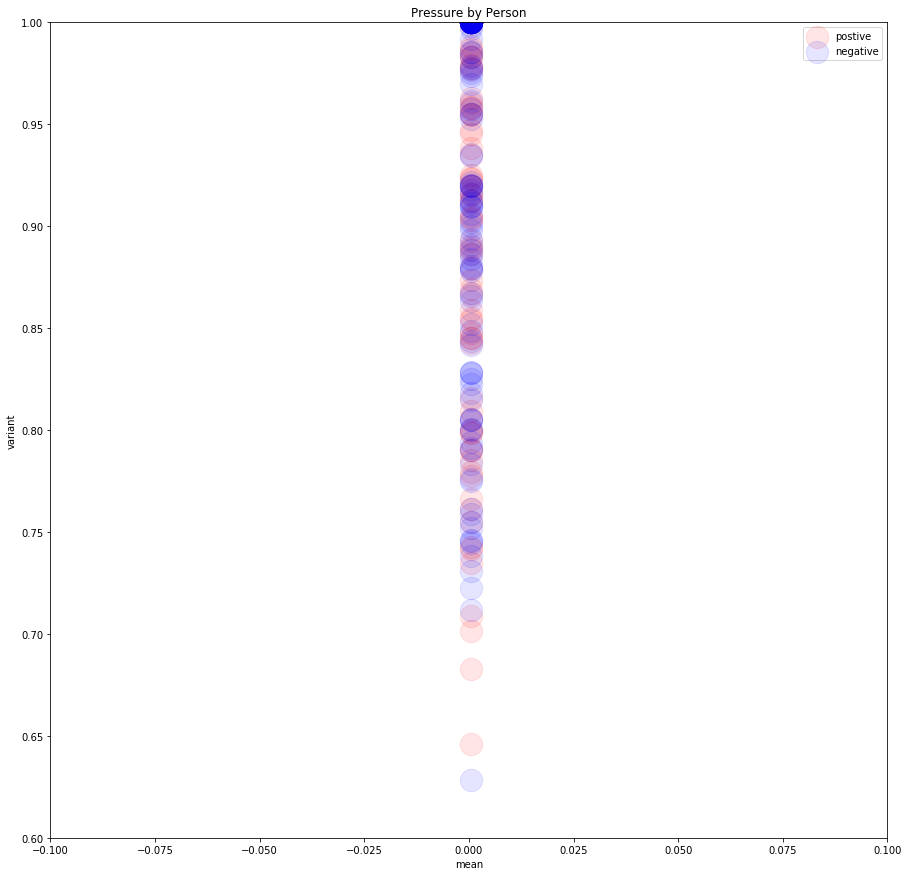

In [152]:
# Pressure by Person

positive_p_max = []
positive_p_min = []
negative_p_max = []
negative_p_min = []

for record in dat:
    
    p = record['p']
    p_max = max(p)
    Pl = []
    for dp in p:
        if dp != 0:
            Pl.append(dp)
    p_min = min(Pl)
    
    if record['clock_drawing'] == 1:
        positive_p_max.append(p_max)
        positive_p_min.append(p_min)
    else:
        negative_p_max.append(p_max)
        negative_p_min.append(p_min)
    
fig, ax = plt.subplots(figsize=(15, 15))
plt.title('Pressure by Person')
plt.ylim(0.6, 1)
plt.xlim(-0.1, 0.1)
plt.xlabel('mean')
plt.ylabel('variant')
s = 500
alpha = 0.1
plt.scatter(positive_p_min, positive_p_max, c='r', s=s, label='postive', alpha=alpha)
plt.scatter(negative_p_min, negative_p_max, c='b', s=s, label='negative', alpha=alpha)
plt.legend()
plt.show()

In [153]:
def extract_object(obj):
    p = obj[:, 0]
    pt = obj[:, 1]
    x = obj[:, 2]
    y = obj[:, 3]
    t = obj[:, 4]
    n = len(t_i)
    
    return p, pt, x, y, t, n

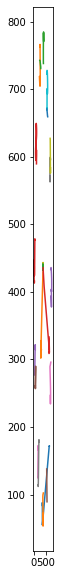

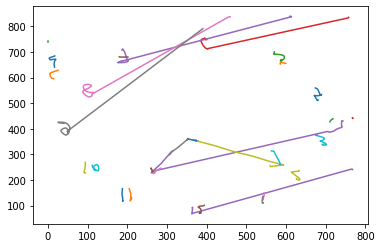

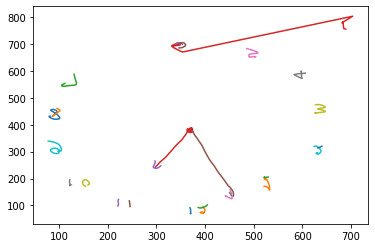

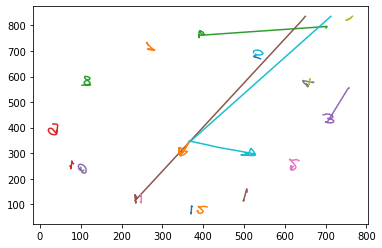

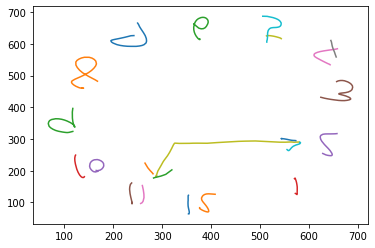

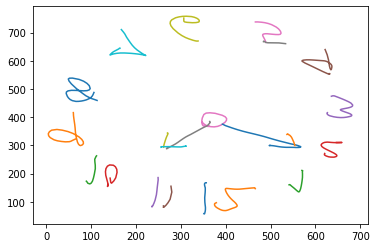

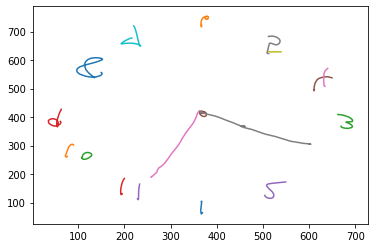

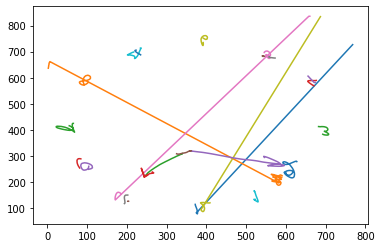

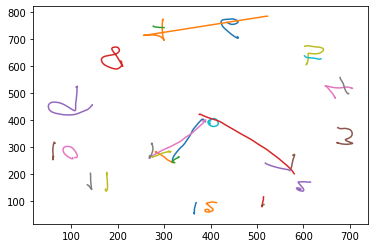

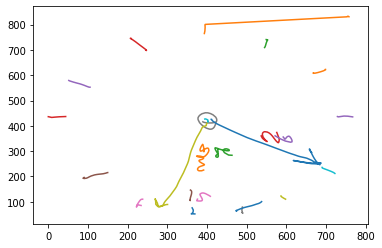

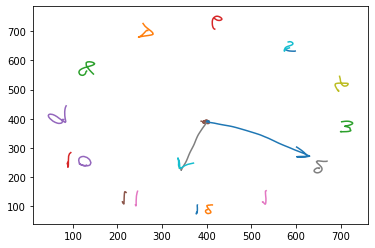

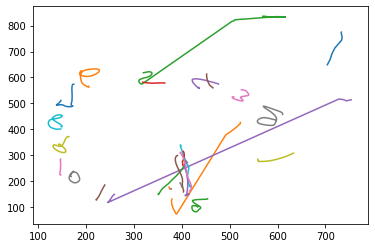

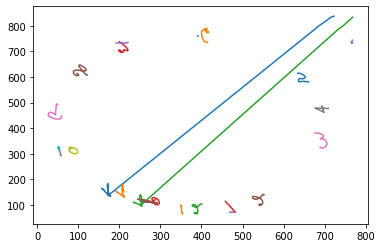

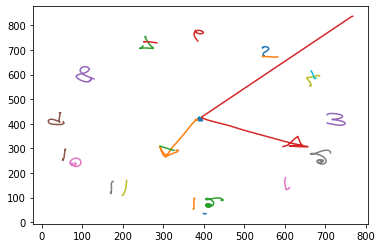

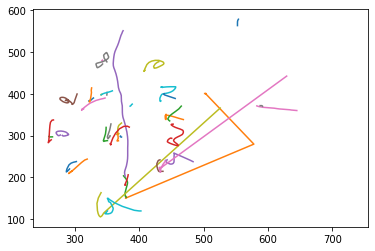

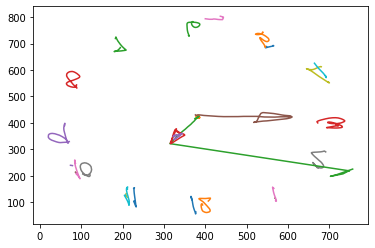

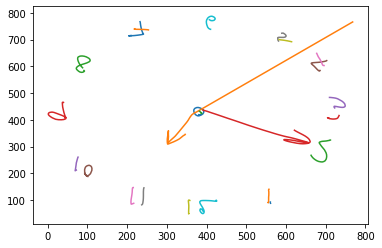

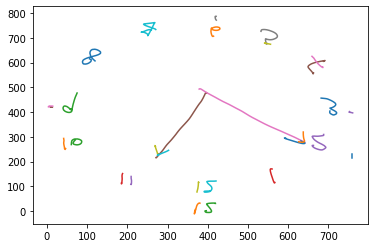

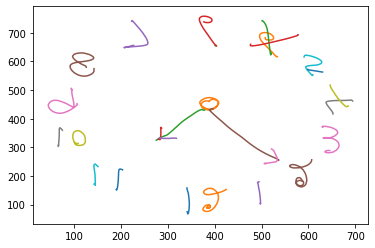

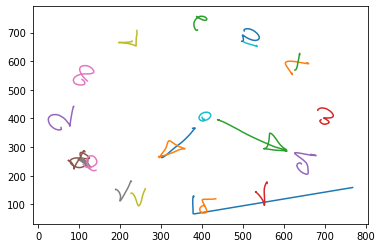

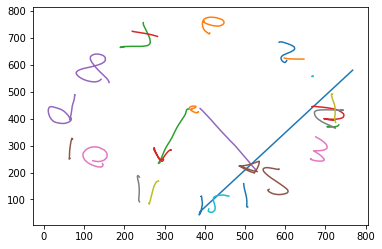

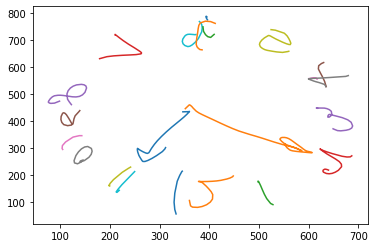

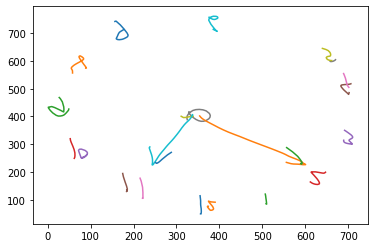

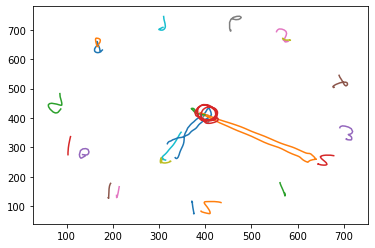

ValueError: num must be 1 <= num <= 21, not 25

In [154]:
# Components by Person

fig = plt.figure(figsize=(10, 10))
for k in range(N):
    record = dat[k]
    objects = get_objects(record)
    n_obj = len(objects)
    
    axs = fig.add_subplot(1, n_obj, k + 1)
    for i in range(n_obj):
        obj = objects[i]
        
        p, pt, x, y, t, n = extract_object(obj)
        
        plt.plot(x, y)
    plt.show()

In [155]:
def get_curve(obj):
    
    x = obj[:, 2]
    y = obj[:, 3]
    t = obj[:, 4]
    n = len(t)
    
    dt = t[-1] - t[0]
    vl = []
    for i in range(n - 1):
        if t[i + 1] - t[i] != 0:
            dv = np.sqrt((x[i + 1] - x[i])**2 + (y[i + 1] - y[i])**2) / (t[i + 1] - t[i])
            vl.append(dv)
    v = np.mean(vl)
    var = np.var(vl)
    return v, dt, var

80 116


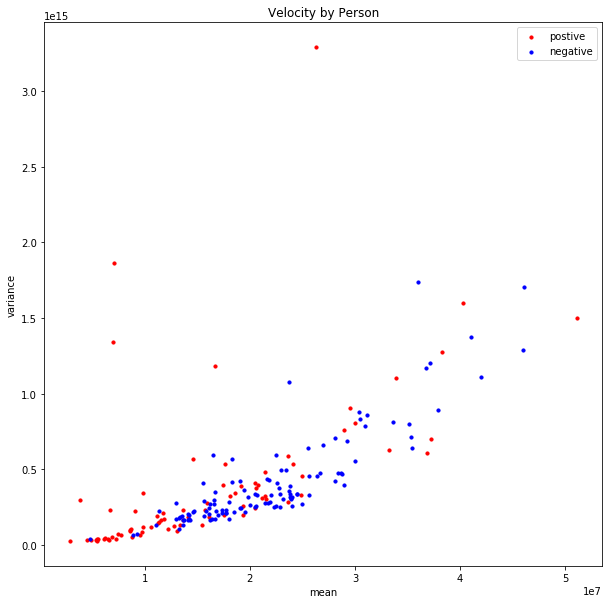

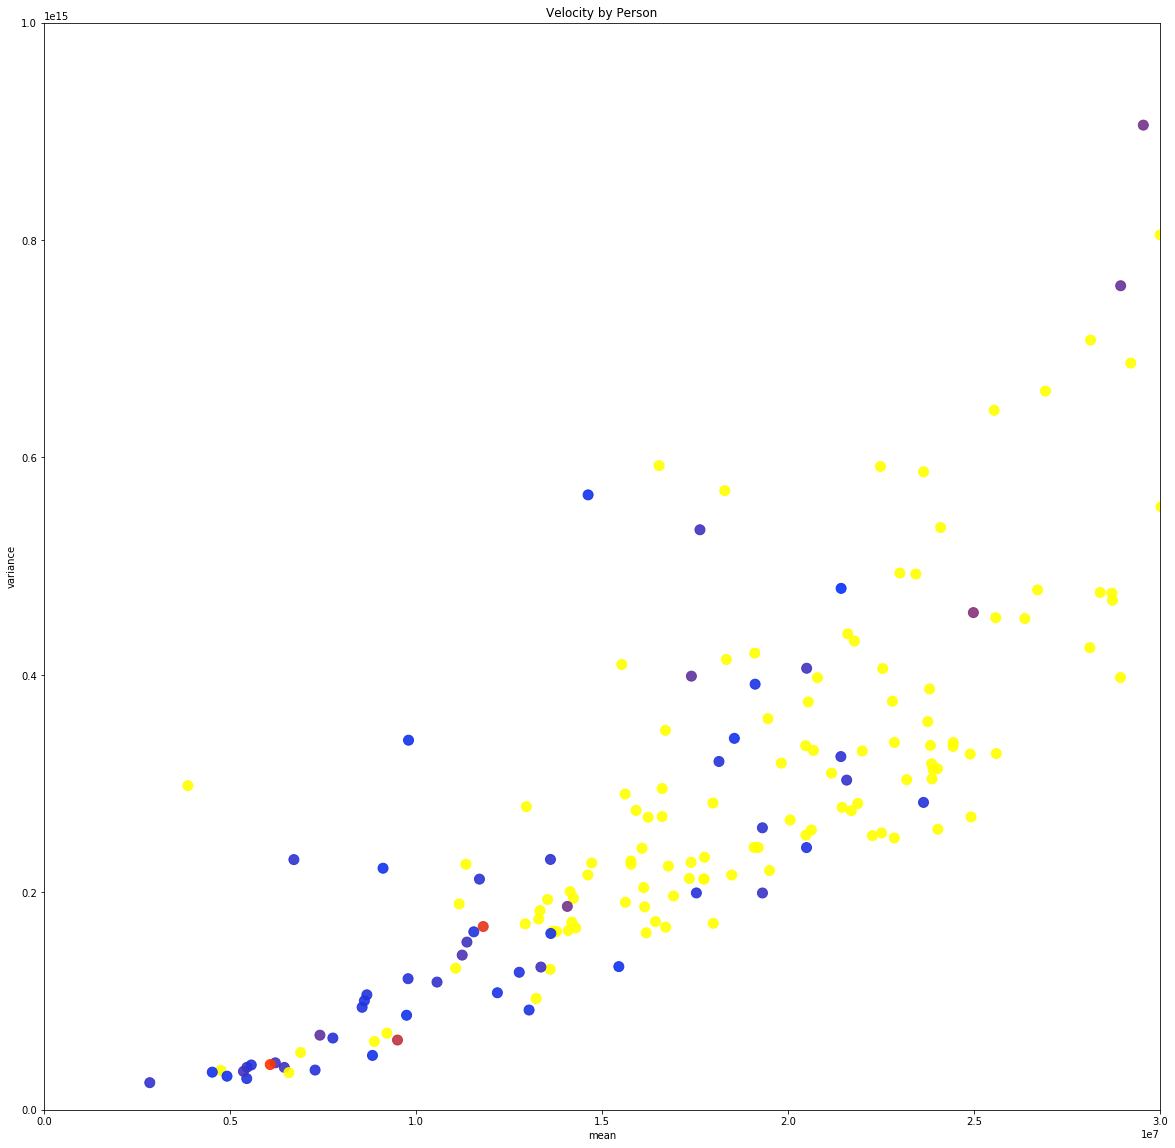

In [156]:
# Velocity by Person

positive_v_mean = []
positive_v_var = []
negative_v_mean = []
negative_v_var = []

vel = []
dur = []

for record in dat:
    dur.append(record['duration'])
dur_max = max(dur)
dur_min = min(dur)
    
for record in dat:
    
    objects = get_objects(record)
    
    mean_l = []
    var_l = []
    for obj in objects:
        v, dt, v_var = get_curve(obj)
        mean_l.append(v)
        var_l.append(v_var)
    
    mean = np.mean(mean_l)
    var = np.mean(var_l)
    
    if record['diagnosis'] == 1:
        positive_v_mean.append(mean)
        positive_v_var.append(var)
    else:
        negative_v_mean.append(mean)
        negative_v_var.append(var)
        
    ddur = (record['duration']  - dur_min) / (dur_max - dur_min)
    if ddur == 0:
        c = [1, 1, 0]
    else:
        c = [ddur, 0.2, 1 - ddur]
    vel.append((mean, var, c))
    
vel = np.array(vel)
print(len(positive_v_mean), len(negative_v_mean))
fig, ax = plt.subplots(figsize=(10, 10))
plt.title('Velocity by Person')
plt.xlabel('mean')
plt.ylabel('variance')
plt.scatter(positive_v_mean, positive_v_var, c='r', s=10, label='postive', alpha=1)
plt.scatter(negative_v_mean, negative_v_var, c='b', s=10, label='negative', alpha=1)
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(20, 20))
plt.xlim(0, 3e7)
plt.ylim(0, 1e15)
plt.title('Velocity by Person')
plt.xlabel('mean')
plt.ylabel('variance')
plt.scatter(vel[:, 0], vel[:, 1], c=vel[:, 2], s=100, alpha=0.9)
plt.show()

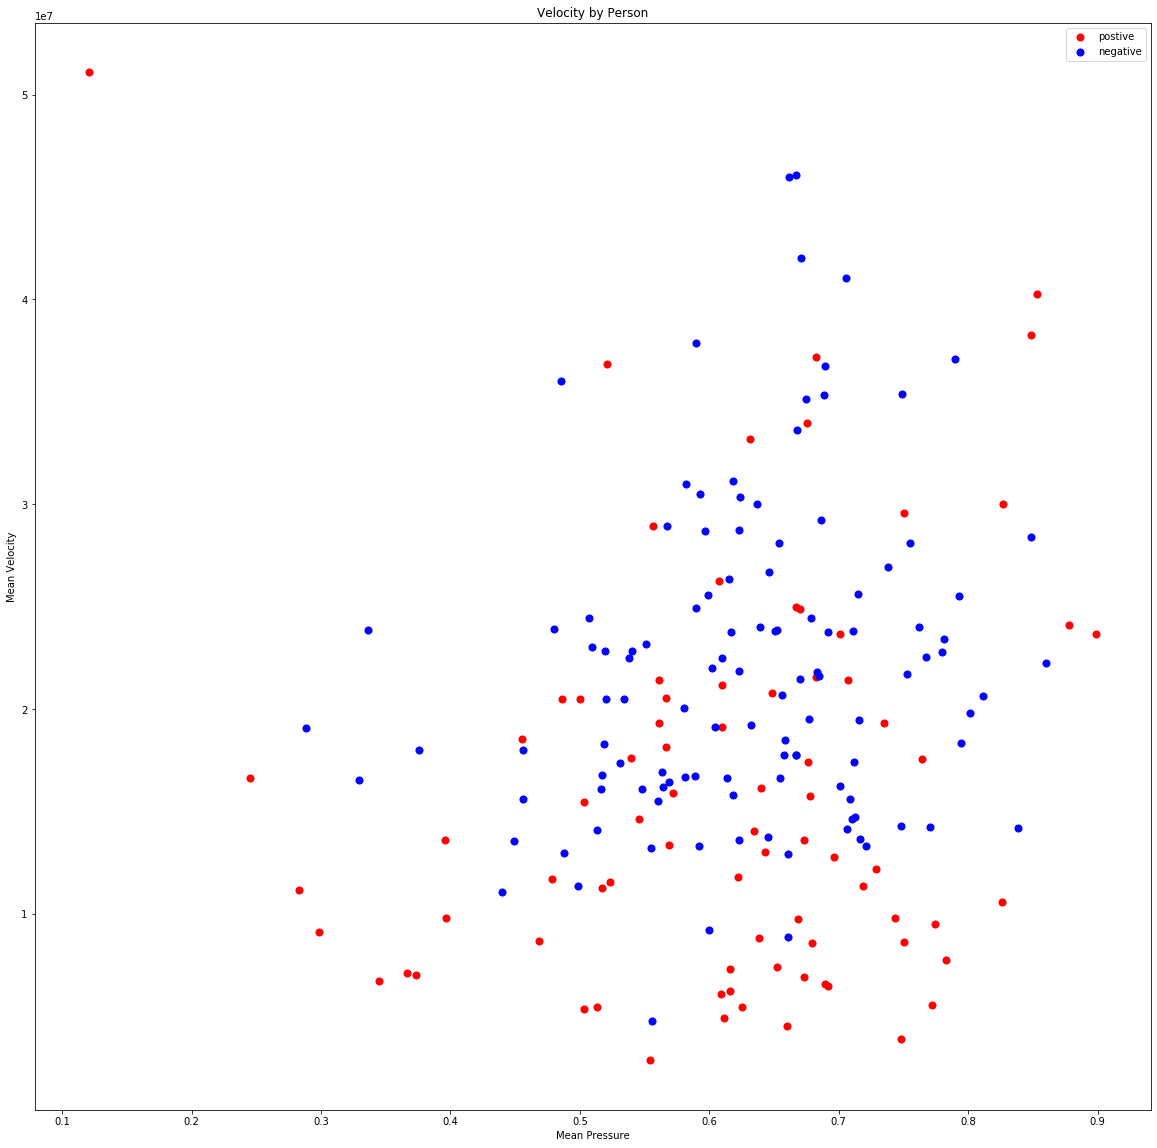

In [160]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.title('Velocity by Person')
plt.xlabel('Mean Pressure')
plt.ylabel('Mean Velocity')
plt.scatter(positive_p_mean, positive_v_mean, c='r', s=50, label='postive', alpha=1)
plt.scatter(negative_p_mean, negative_v_mean, c='b', s=50, label='negative', alpha=1)
plt.legend()
plt.show()